In [2]:
!pip install opencv-python

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


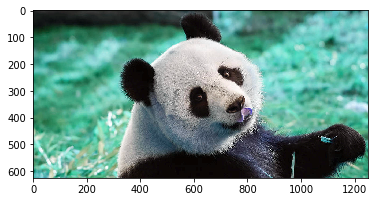

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io

image = cv2.imread('pandaorig.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('pandaorig3.jpg', quant)
plt.imshow(image)

cv2.imread('pandaorig3.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

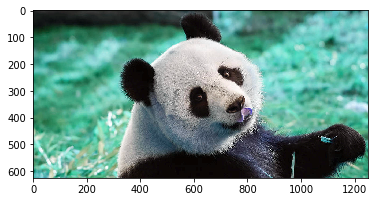

In [4]:
plt.imshow(image)

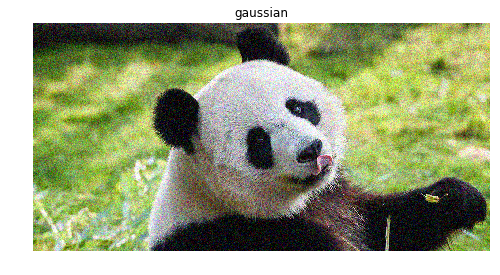

In [16]:
import skimage.io
import matplotlib.pyplot as plt
img_path="pandaorig.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
#plotnoise(img, "localvar", r,c,2)
#plotnoise(img, "poisson", r,c,3)
#plotnoise(img, "salt", r,c,4)
#plotnoise(img, "pepper", r,c,5)
#plotnoise(img, "s&p", r,c,6)
#plotnoise(img, "speckle", r,c,7)
#plotnoise(img, None, r,c,8)
plt.show()



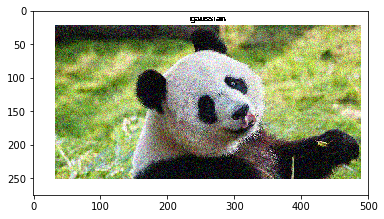

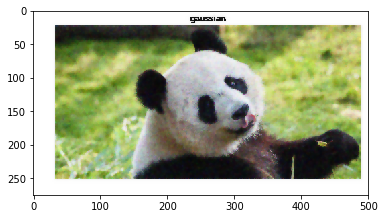

In [6]:
from skimage.restoration import denoise_tv_chambolle
# Read the image
pandas_noise= cv2.imread('pandas_noise.png')
#Change color to RGB
image = cv2.cvtColor(pandas_noise, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
plt.show()

denoised_image1= denoise_tv_chambolle(image,weight=0.1,multichannel= True)

plt.imshow(denoised_image1)

plt.show()

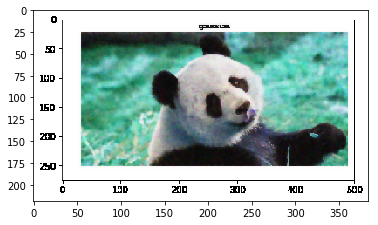

In [7]:

image = cv2.imread('denoise_pandas.png')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('denoise_pandas3.png', quant)
plt.imshow(image)

cv2.imread('denoise_pandas3.png')
cv2.waitKey(0)
cv2.destroyAllWindows()

# AUTREMENT

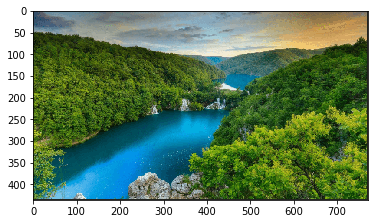

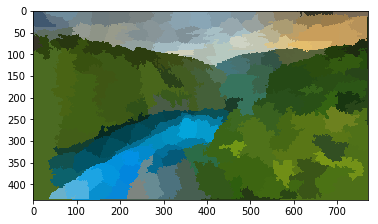

In [47]:
#Unsupervised Segmentation : Simple linear iterative Clustering == K-means Clustering
from skimage.segmentation import slic
from skimage.color import label2rgb

import numpy as np
import matplotlib.pyplot as plt
import cv2
# Read the image
image= cv2.imread('nature.png')
#Change color to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
  
plt.imshow(image)
plt.show()
segments = slic(image, n_segments=300)
segmented_image= label2rgb(segments,image, kind ='avg')
plt.imshow(segmented_image)
plt.show()



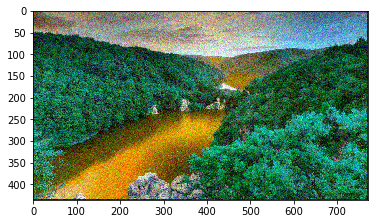

In [48]:
#Autre Méthode
from skimage.util import random_noise
image = cv2.imread('nature.png')
noisy_image = random_noise(image)
plt.imshow(noisy_image)

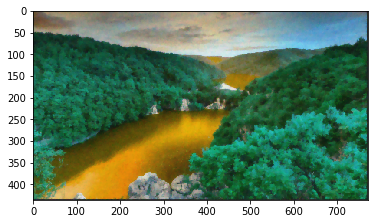

In [49]:
# Using total variation filter denoising
from skimage.restoration import denoise_tv_chambolle
denoised_image1= denoise_tv_chambolle(noisy_image,weight=0.1,multichannel= True)
plt.imshow(denoised_image1)
plt.show()

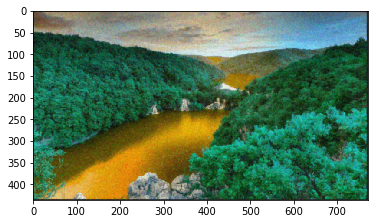

In [50]:
# Bilater filter
from skimage.restoration import denoise_bilateral
denoised_image2=denoise_bilateral(noisy_image,multichannel=True)
plt.imshow(denoised_image2)

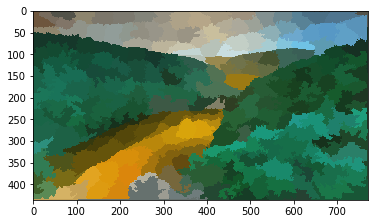

In [51]:
#Unsupervised Segmentation : Simple linear iterative Clustering == K-means Clustering
from skimage.segmentation import slic
from skimage.color import label2rgb
segments = slic(denoised_image1, n_segments=300)
segmented_image= label2rgb(segments,denoised_image1, kind ='avg')
plt.imshow(segmented_image)

